In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cotton-leaf-disease-dataset/test/Powdery Mildew/20.jpg
/kaggle/input/cotton-leaf-disease-dataset/test/Powdery Mildew/6.jpg
/kaggle/input/cotton-leaf-disease-dataset/test/Powdery Mildew/5.jpg
/kaggle/input/cotton-leaf-disease-dataset/test/Powdery Mildew/8.jpg
/kaggle/input/cotton-leaf-disease-dataset/test/Powdery Mildew/30.jpg
/kaggle/input/cotton-leaf-disease-dataset/test/Powdery Mildew/38.jpg
/kaggle/input/cotton-leaf-disease-dataset/test/Powdery Mildew/33.jpg
/kaggle/input/cotton-leaf-disease-dataset/test/Powdery Mildew/10.jpg
/kaggle/input/cotton-leaf-disease-dataset/test/Powdery Mildew/35.jpg
/kaggle/input/cotton-leaf-disease-dataset/test/Powdery Mildew/9.jpg
/kaggle/input/cotton-leaf-disease-dataset/test/Powdery Mildew/37.jpg
/kaggle/input/cotton-leaf-disease-dataset/test/Powdery Mildew/1.jpg
/kaggle/input/cotton-leaf-disease-dataset/test/Powdery Mildew/29.jpg
/kaggle/input/cotton-leaf-disease-dataset/test/Powdery Mildew/16.jpg
/kaggle/input/cotton-leaf-disease-datas

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow.keras.applications import InceptionResNetV2, EfficientNetB3
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import backend as K
from tensorflow.keras.metrics import Precision, Recall, AUC


In [3]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_dir = "/kaggle/input/cotton-leaf-disease-dataset/train"
test_dir = "/kaggle/input/cotton-leaf-disease-dataset/test"

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    horizontal_flip=True,
    zoom_range=0.3
)

train_generator = datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="sparse", shuffle=True
)
test_generator = datagen.flow_from_directory(
    test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="sparse", shuffle=False
)


Found 2400 images belonging to 6 classes.
Found 237 images belonging to 6 classes.


Found 2400 images belonging to 6 classes.
Found 237 images belonging to 6 classes.
219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━

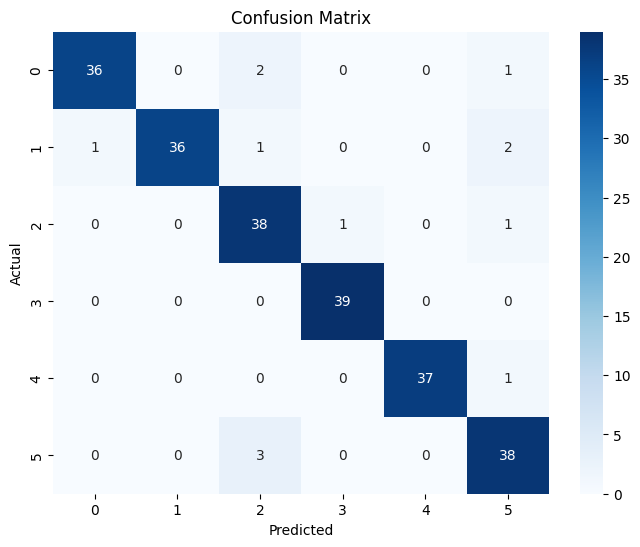

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95        39
           1       1.00      0.90      0.95        40
           2       0.86      0.95      0.90        40
           3       0.97      1.00      0.99        39
           4       1.00      0.97      0.99        38
           5       0.88      0.93      0.90        41

    accuracy                           0.95       237
   macro avg       0.95      0.95      0.95       237
weighted avg       0.95      0.95      0.95       237



In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow.keras.applications import InceptionResNetV2, EfficientNetB3
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import backend as K
from tensorflow.keras.metrics import Precision, Recall, AUC


# Load dataset
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_dir = "/kaggle/input/cotton-leaf-disease-dataset/train"
test_dir = "/kaggle/input/cotton-leaf-disease-dataset/test"

# Improved Data Augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    horizontal_flip=True,
    zoom_range=0.3
)
train_generator = datagen.flow_from_directory(train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="sparse", shuffle=True)
test_generator = datagen.flow_from_directory(test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode="sparse", shuffle=False)

# Feature Extraction with Two Models
def extract_features(generator, model, num_images):
    features, labels = [], []
    for images, lbls in generator:
        batch_features = model.predict(images)
        features.extend(batch_features)
        labels.extend(lbls)
        if len(features) >= num_images:
            break
    return np.array(features[:num_images]), np.array(labels[:num_images], dtype=int)

# Use an Ensemble of Feature Extractors
base_model1 = InceptionResNetV2(weights="imagenet", include_top=False, pooling="avg", input_shape=(224, 224, 3))
base_model2 = EfficientNetB3(weights="imagenet", include_top=False, pooling="avg", input_shape=(224, 224, 3))

feature_extractor1 = Model(inputs=base_model1.input, outputs=base_model1.output)
feature_extractor2 = Model(inputs=base_model2.input, outputs=base_model2.output)

# Extract features for train & test
X_train_features1, y_train_labels = extract_features(train_generator, feature_extractor1, train_generator.samples)
X_train_features2, _ = extract_features(train_generator, feature_extractor2, train_generator.samples)
X_test_features1, y_test_labels = extract_features(test_generator, feature_extractor1, 237)
X_test_features2, _ = extract_features(test_generator, feature_extractor2, 237)

# Concatenate Features from Both Extractors
X_train_features = np.concatenate([X_train_features1, X_train_features2], axis=1)
X_test_features = np.concatenate([X_test_features1, X_test_features2], axis=1)

# Apply SMOTE Only on Training Data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_features, y_train_labels)

# Split training data into train-validation
x_train, x_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

from tensorflow.keras.utils import to_categorical

# Convert integer labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=6)
y_val = to_categorical(y_val, num_classes=6)

# Focal Loss (to handle class imbalance)
def focal_loss(alpha=0.25, gamma=2.0):
    def loss(y_true, y_pred):
        # Ensure y_true and y_pred have the same shape
        y_true = K.cast(y_true, 'float32')  # Convert labels to float
        y_pred = K.clip(y_pred, 1e-8, 1.0 - 1e-8)  # Avoid log(0) issues

        # Compute focal loss
        p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)
        loss = -alpha * K.pow(1 - p_t, gamma) * K.log(p_t)

        return K.mean(loss)
    return loss


# Improve Meta-Heuristic Optimization
class GeneticAlgorithm:
    def __init__(self, population_size=20, generations=15):  # Increased size & depth
        self.population_size = population_size
        self.generations = generations
        self.population = [{'learning_rate': random.uniform(0.00005, 0.003),
                            'units': random.randint(128, 512),
                            'dropout': random.uniform(0.2, 0.5)} for _ in range(population_size)]

    def evaluate(self, params):
        model = Sequential([
            tf.keras.layers.Input(shape=(3072,)),  # Fix input layer
            Dense(int(params['units']), activation='relu'),
            BatchNormalization(),
            Dropout(params['dropout']),
            Dense(256, activation='relu'),
            Dropout(0.3),
            Dense(6, activation='softmax')
        ])
        model.compile(optimizer=Adam(learning_rate=params['learning_rate']),
                      loss=focal_loss(),  # Using Focal Loss
                      metrics=['accuracy'])
        history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), verbose=0)
        return history.history.get('val_accuracy', [0.0])[-1]

    def optimize(self):
        for _ in range(self.generations):
            scores = [(self.evaluate(ind), ind) for ind in self.population]
            scores.sort(reverse=True, key=lambda x: x[0])
            self.population = [ind for _, ind in scores[:self.population_size // 2]]
        return self.population[0]

# Train Model with Best Hyperparameters
optimizer = GeneticAlgorithm(population_size=20, generations=15)
best_hyperparams = optimizer.optimize()

final_model = Sequential([
    tf.keras.layers.Input(shape=(3072,)),  # Fix input layer
    Dense(int(best_hyperparams['units']), activation='relu'),
    BatchNormalization(),
    Dropout(best_hyperparams['dropout']),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(6, activation='softmax')
])
final_model.compile(
    optimizer=Adam(learning_rate=best_hyperparams['learning_rate']),
    loss=focal_loss(),
    metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
)

history = final_model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))

# Evaluate on Test Data
y_pred = np.argmax(final_model.predict(X_test_features), axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred))

In [5]:
train_precision = history.history.get('precision') or history.history.get('precision_1')
val_precision = history.history.get('val_precision') or history.history.get('val_precision_1')
train_recall = history.history.get('recall') or history.history.get('recall_1')
val_recall = history.history.get('val_recall') or history.history.get('val_recall_1')

train_f1 = [2 * (p * r) / (p + r) if (p + r) != 0 else 0 for p, r in zip(train_precision, train_recall)]
val_f1 = [2 * (p * r) / (p + r) if (p + r) != 0 else 0 for p, r in zip(val_precision, val_recall)]


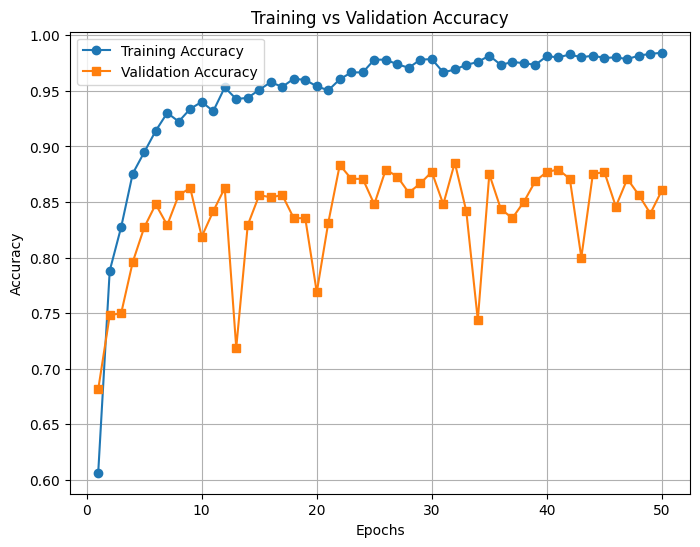

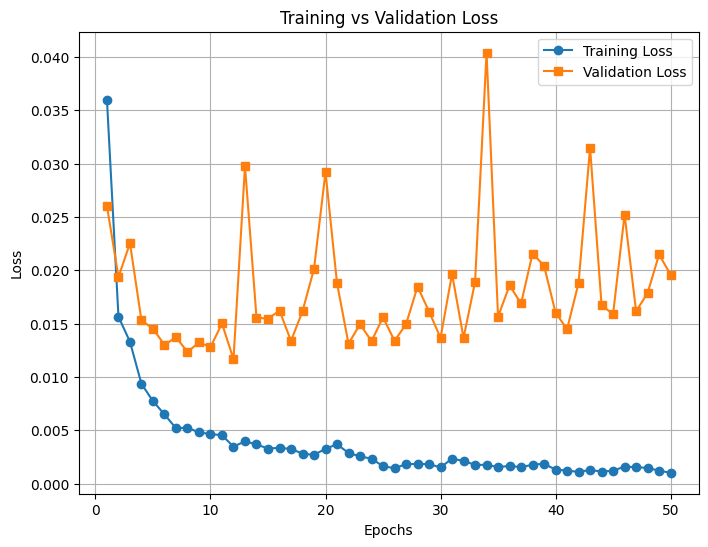

In [6]:
# Extract accuracy and loss from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Training and Validation Accuracy
epochs = range(1, len(train_accuracy) + 1)  # Define epoch range

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


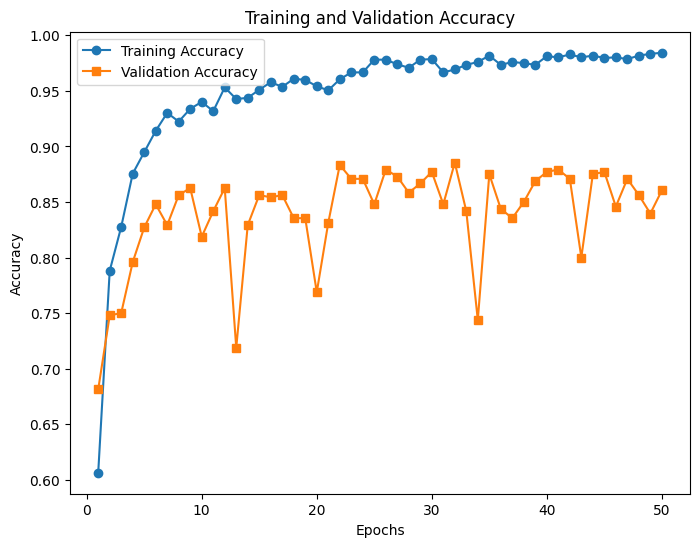

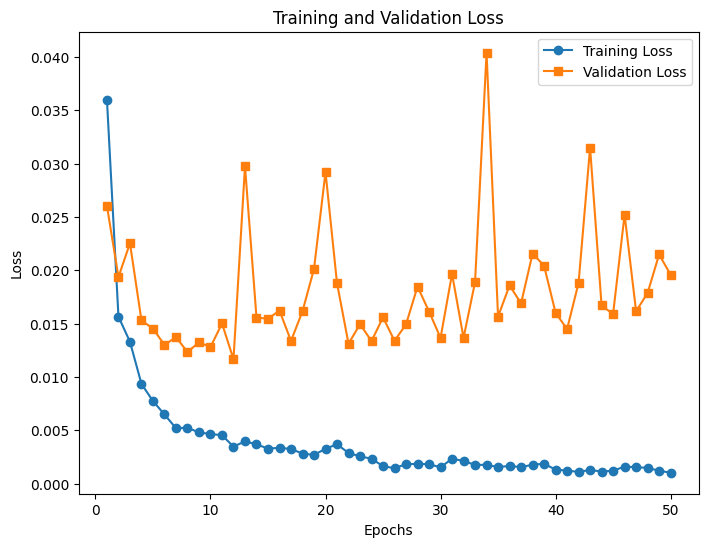

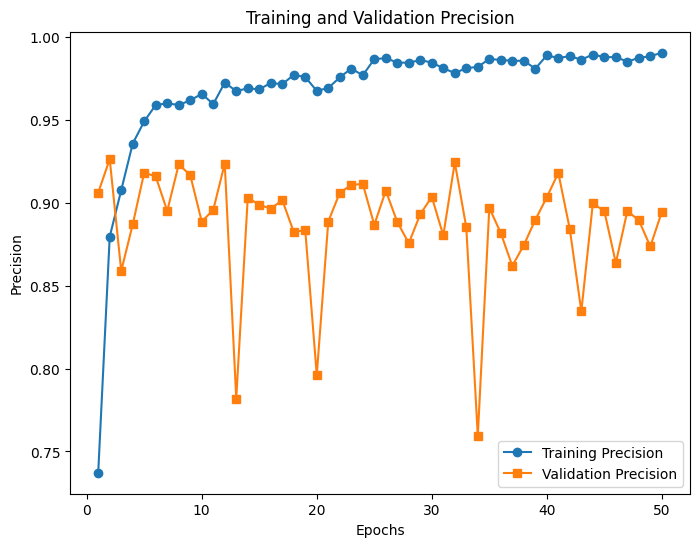

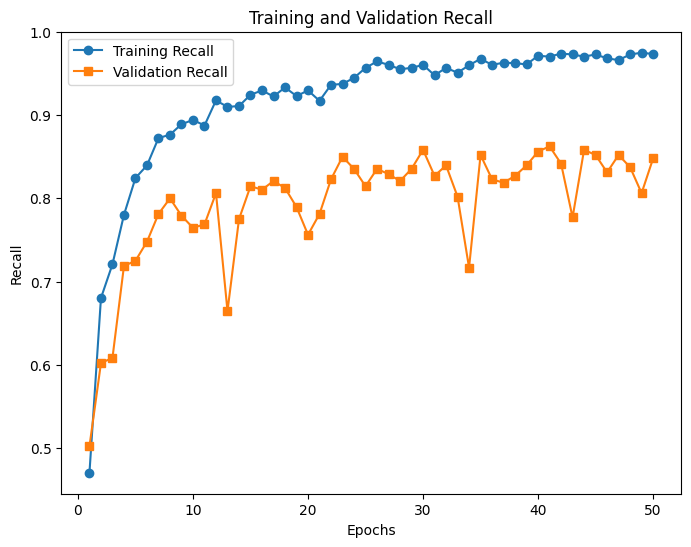

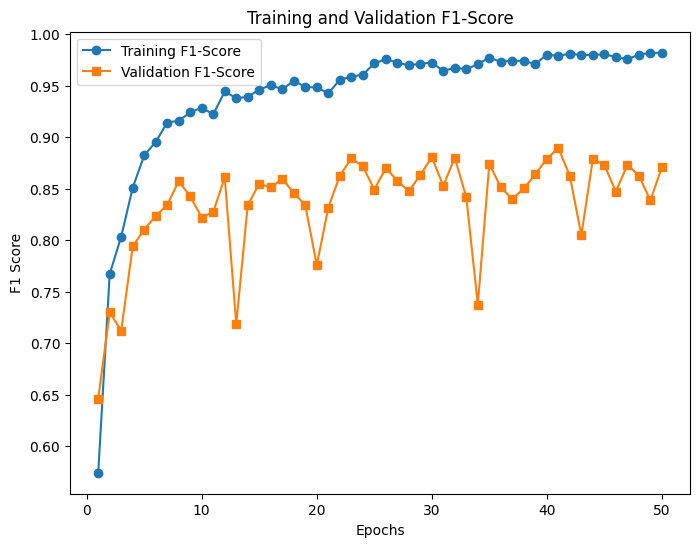

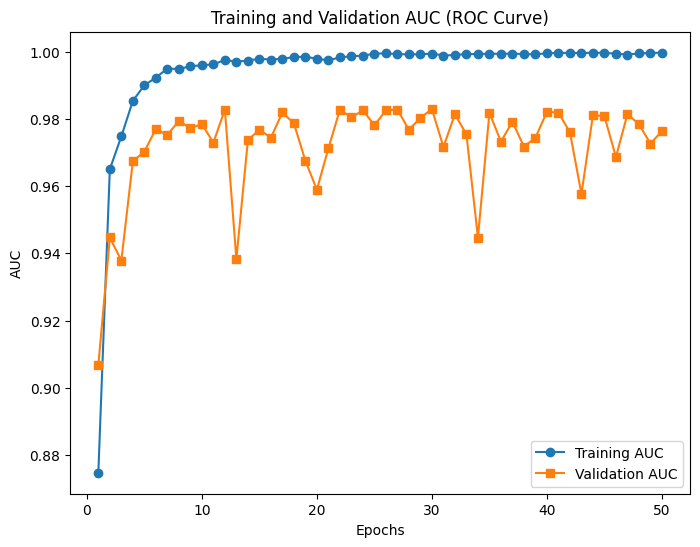

In [7]:
import matplotlib.pyplot as plt

epochs = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_precision, label='Training Precision', marker='o')
plt.plot(epochs, val_precision, label='Validation Precision', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.title('Training and Validation Precision')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_recall, label='Training Recall', marker='o')
plt.plot(epochs, val_recall, label='Validation Recall', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Training and Validation Recall')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(epochs, train_f1, label='Training F1-Score', marker='o')
plt.plot(epochs, val_f1, label='Validation F1-Score', marker='s')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.title('Training and Validation F1-Score')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(epochs, history.history['auc'], label='Training AUC', marker='o')
plt.plot(epochs, history.history['val_auc'], label='Validation AUC', marker='s')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.title('Training and Validation AUC (ROC Curve)')
plt.legend()
plt.show()

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


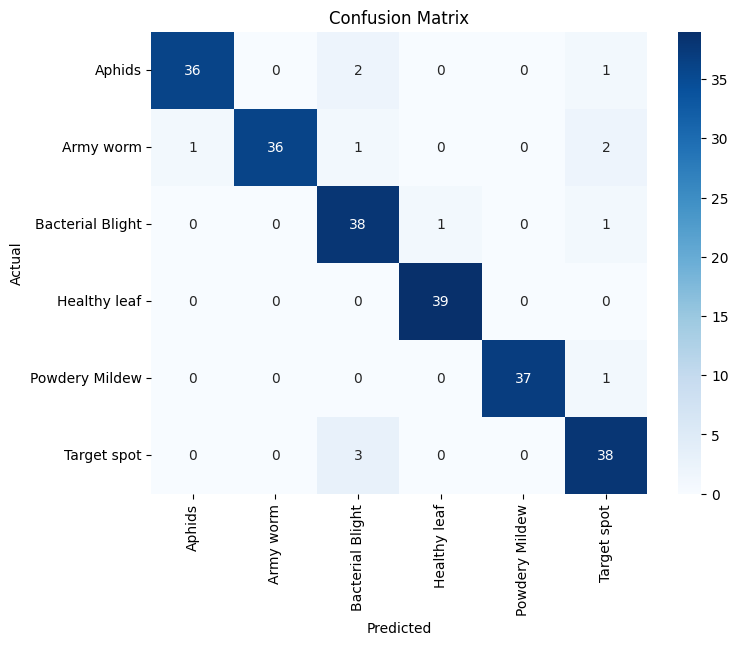

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define class names
class_names = ["Aphids", "Army worm", "Bacterial Blight", "Healthy leaf", "Powdery Mildew", "Target spot"]

# Generate predictions
y_pred = np.argmax(final_model.predict(X_test_features), axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)

# Plot confusion matrix with class labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [9]:
from sklearn.metrics import classification_report

# Print classification report with class names
print("Classification Report:")
print(classification_report(y_test_labels, y_pred, target_names=class_names))


Classification Report:
                  precision    recall  f1-score   support

          Aphids       0.97      0.92      0.95        39
       Army worm       1.00      0.90      0.95        40
Bacterial Blight       0.86      0.95      0.90        40
    Healthy leaf       0.97      1.00      0.99        39
  Powdery Mildew       1.00      0.97      0.99        38
     Target spot       0.88      0.93      0.90        41

        accuracy                           0.95       237
       macro avg       0.95      0.95      0.95       237
    weighted avg       0.95      0.95      0.95       237



157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Actual Class: 5


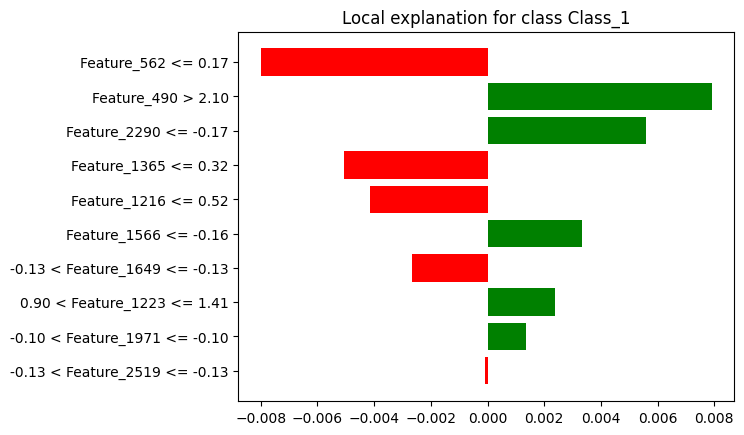

In [10]:
import lime
import lime.lime_tabular
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Define the explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=x_train,    # Use training data
    feature_names=[f'Feature_{i}' for i in range(x_train.shape[1])],  # Generic feature names
    class_names=['Class_0', 'Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5'],  # Update based on dataset
    mode="classification"
)

# Select a random test instance
random_index = random.randint(0, X_test_features.shape[0] - 1)
test_instance = X_test_features[random_index]
true_label = y_test_labels[random_index]

# Define a wrapper function to make predictions in the correct format for LIME
def predict_fn(features):
    return final_model.predict(features)

# Get LIME explanation for the test instance
exp = explainer.explain_instance(
    data_row=test_instance, 
    predict_fn=predict_fn,
    num_features=10  # Number of features to explain
)
# Display explanation in text format
print(f"Actual Class: {true_label}")
exp.show_in_notebook()

# Plot feature importance
exp.as_pyplot_figure()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
2560/2560 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Actual Class: 3


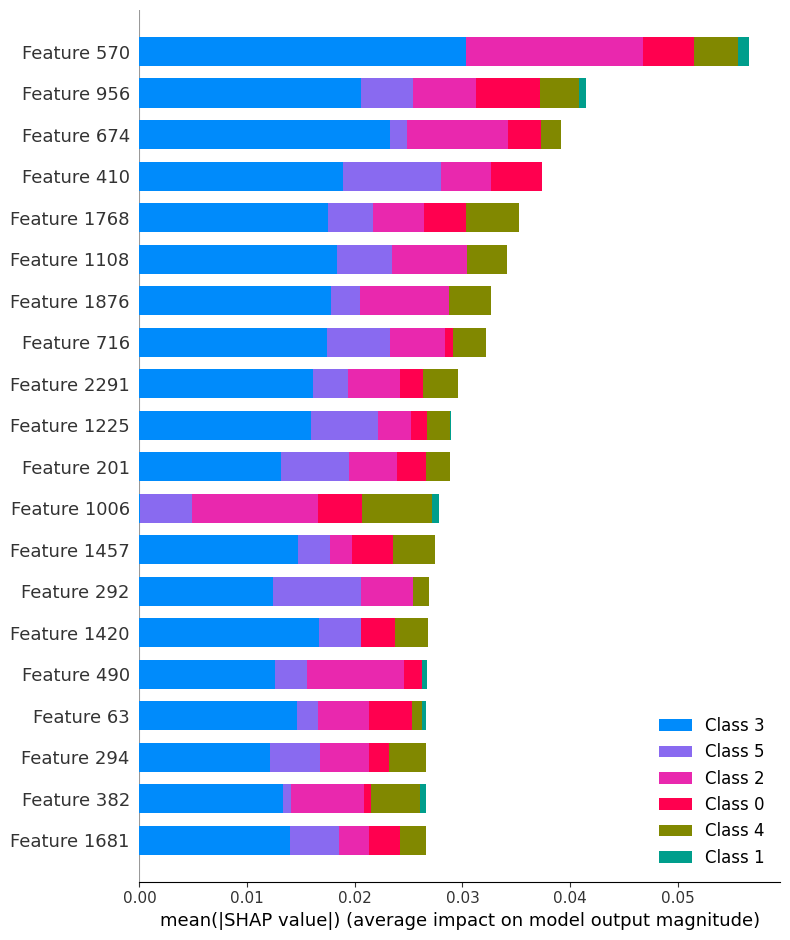

In [11]:
# Install SHAP if not already installed
!pip install shap

# Import Required Libraries
import shap
import numpy as np
import random
import matplotlib.pyplot as plt

# Initialize SHAP Explainer with a small subset of training data
explainer = shap.KernelExplainer(final_model.predict, x_train[:10])  # Use only 10 training samples as background

# Select a Random Test Sample
random_index = random.randint(0, X_test_features.shape[0] - 1)
test_instance = X_test_features[random_index].reshape(1, -1)  # Reshape for model input
true_label = y_test_labels[random_index]

# Compute SHAP Values for the Single Test Image
shap_values = explainer.shap_values(test_instance)

# Display Explanation for the Selected Image
print(f"Actual Class: {true_label}")
shap.initjs()

# Force Plot (Local Explanation)
shap.force_plot(explainer.expected_value[0], shap_values[0], test_instance)

# Bar Plot (Feature Importance Ranking for this Image)
shap.summary_plot(shap_values, test_instance, plot_type="bar")


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━

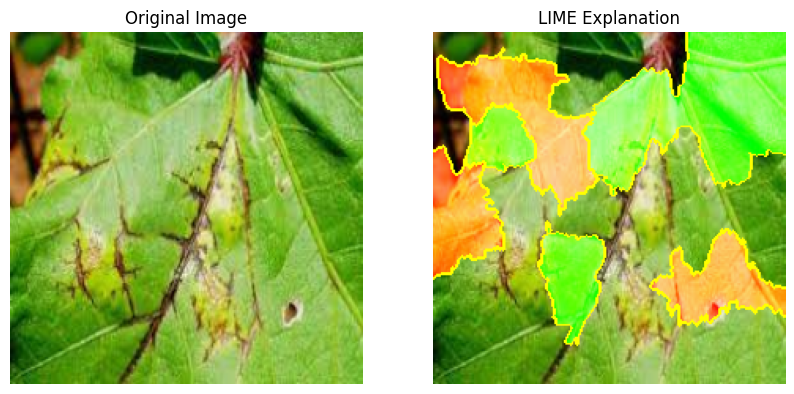

In [13]:
# Install required libraries
!pip install lime opencv-python matplotlib numpy tensorflow

# Import necessary libraries
import lime
import lime.lime_image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries

# Load a sample test image
image_path = "/kaggle/input/cotton-leaf-disease-dataset/train/Bacterial Blight/13.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Resize the image to match model input size
IMG_SIZE = (224, 224)
image_resized = cv2.resize(image, IMG_SIZE)
image_array = np.expand_dims(image_resized / 255.0, axis=0)  # Normalize & add batch dimension

# Define LIME explainer
explainer = lime.lime_image.LimeImageExplainer()

# ✅ Modify `predict_fn()` to extract features before passing to final_model
def predict_fn(images):
    """Extract features from images and predict using final_model."""
    images_resized = np.array([cv2.resize(img, IMG_SIZE) / 255.0 for img in images])  # Resize & normalize
    extracted_features1 = feature_extractor1.predict(images_resized)  # Extract from InceptionResNetV2
    extracted_features2 = feature_extractor2.predict(images_resized)  # Extract from EfficientNetB3
    combined_features = np.concatenate([extracted_features1, extracted_features2], axis=1)  # Merge features
    return final_model.predict(combined_features)  # Get predictions

# Explain the image using LIME
explanation = explainer.explain_instance(
    image_resized,
    predict_fn,
    top_labels=2,  # Show top 2 classes
    hide_color=0,
    num_samples=1000  # Number of perturbed samples
)

# Get the explanation mask
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only=False,
    num_features=10,
    hide_rest=False
)

# Display the original & LIME explained image
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_resized)
plt.title("Original Image")
plt.axis("off")

# LIME-explained image
plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp, mask))
plt.title("LIME Explanation")
plt.axis("off")

# Print correct vs predicted labels
predicted_label = np.argmax(predict_fn(image_array))
correct_label = 1  # Replace with actual correct label
print(f"Correct Label: {correct_label}")
print(f"Predicted Label: [{predicted_label}]")

plt.show()
